In [2]:

import pandas as pd
import numpy as np
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anukulchandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anukulchandra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# from google.colab import drive  # Used to import Google Drive functionality in Colab
# drive.mount('/content/drive')  # Mounts Google Drive to access files

# df = pd.read_csv("//content/drive/MyDrive/Anukul_ ES PML 2405/Home Work/Datasets/IMDB Dataset.csv")


In [4]:
df = pd.read_csv('/Users/anukulchandra/python with machine learning /IMDB Dataset.csv')

In [5]:
df =df[0:5000]

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df['sentiment'].value_counts()

sentiment
negative    2532
positive    2468
Name: count, dtype: int64

<Axes: ylabel='sentiment'>

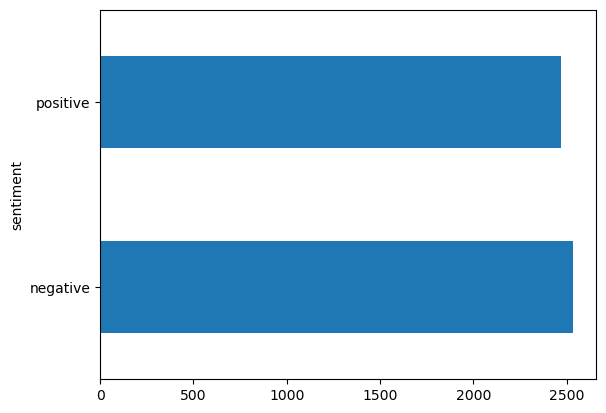

In [8]:
df['sentiment'].value_counts().plot(kind='barh')

In [9]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
positive_review= list(df[df["sentiment"]=='positive']['review'])
negative_review= list(df[df['sentiment']=='negative']['review'])

#  WordCloud Keyword kno use kora hoi ?
 - . Text er Moddhe Kotha Beshi Important ta Bujhte
Word cloud e je word ta boro dekhabe, oita text e beshi bar use hoise.

- Ete bujha jai text ta kon topic ghotano ba main keyword ki.

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def create_cloud(string, title=None):
    cloud = WordCloud(height=1080,
                      width=1920,
                      background_color='white',
                      min_font_size=10,
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

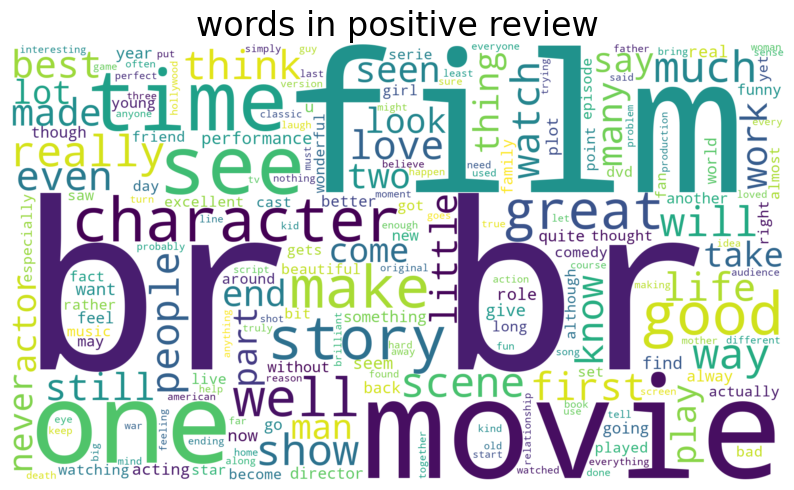

In [12]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

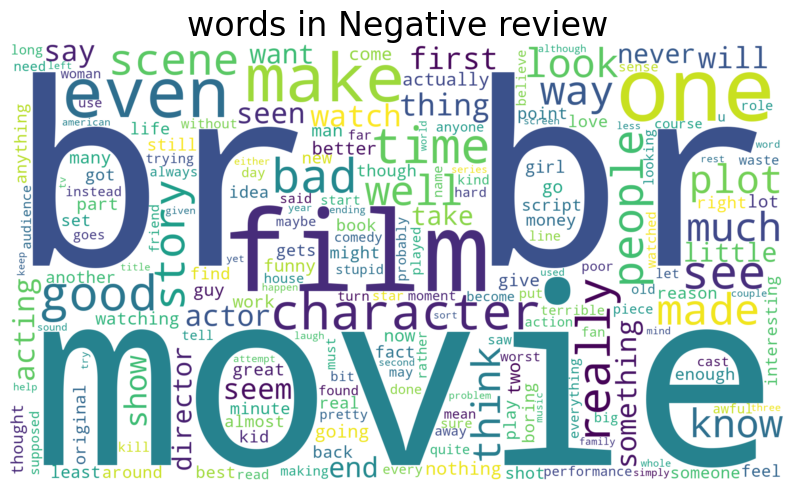

In [13]:
create_cloud(' '.join(negative_review).lower(),'words in Negative review')

In [14]:
import re
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS

# Setup
stopwords = set(STOPWORDS)
lemmatizer = WordNetLemmatizer()

def text_processing(text):
    # Remove links
    text = re.sub(r"http\S+", "", text)

    # Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text()

    # Expand contractions
    text = re.sub(r'<br\s*/?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r'"', " ", text)

    # Remove words with numbers
    text = re.sub(r'\S*\d\S*', '', text).strip()

    # Tokenize, lowercase, remove stopwords, and lemmatize
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]

    return ' '.join(words)


In [15]:
# Clean text
df['cleaned_review'] = df['review'].apply(text_processing)


/var/folders/jf/21x3yjzs0ygd_0ttzq2sq0zm0000gn/T/ipykernel_43035/135519704.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


In [16]:
df

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode wil...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production. filming technique...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy (jake) think zombi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
4995,An interesting slasher film with multiple susp...,negative,interesting slasher film multiple suspects.inc...
4996,i watched this series when it first came out i...,positive,watched series first came year old watched bes...
4997,Once again Jet Li brings his charismatic prese...,positive,jet li brings charismatic presence movie scree...
4998,"I rented this movie, after hearing Chris Gore ...",negative,"rented movie, hearing chris gore saying someth..."


In [17]:

# Encode target label: positive = 1, negative = 0
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])


In [18]:
x = df['cleaned_review']
y = df['sentiment']

In [19]:
# STEP 4: Split dataset
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)


# Bag of Words for vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features=1000)

# Apply CountVectorizer to the 'cleaned_review' column of the training and testing dataframes
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)

print('The top words used',vectorizer.get_feature_names_out())

print('type of bow',type(x_train_bow))

print('Matrix representation',x_train_bow.toarray()[:1])

print('shape',x_train_bow.shape,x_test_bow.shape)

The top words used ['ability' 'able' 'about' 'absolutely' 'accent' 'across' 'act' 'acted'
 'acting' 'action' 'actor' 'actors' 'actress' 'actual' 'actually' 'add'
 'admit' 'adult' 'adventure' 'after' 'again' 'age' 'ago' 'air' 'alien'
 'alive' 'all' 'almost' 'alone' 'along' 'already' 'also' 'although'
 'always' 'amazing' 'america' 'american' 'among' 'amount' 'and' 'animated'
 'animation' 'annoying' 'another' 'anyone' 'anything' 'anyway' 'apart'
 'apparently' 'appear' 'appearance' 'appears' 'appreciate' 'are' 'around'
 'art' 'as' 'aspect' 'at' 'atmosphere' 'attack' 'attempt' 'attention'
 'audience' 'average' 'avoid' 'away' 'awesome' 'awful' 'baby' 'back'
 'background' 'bad' 'badly' 'band' 'based' 'basic' 'basically' 'battle'
 'be' 'beautiful' 'beauty' 'became' 'become' 'becomes' 'before' 'begin'
 'beginning' 'behind' 'believable' 'believe' 'ben' 'best' 'better'
 'beyond' 'big' 'bill' 'bit' 'black' 'blood' 'body' 'book' 'bored'
 'boring' 'box' 'boy' 'brain' 'break' 'brilliant' 'bring' 'bri

In [21]:
x_train_bow.shape

(4000, 1000)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': list(range(60, 90, 5))}
neigh = KNeighborsClassifier()

# GridSearchCV object
Gsv = GridSearchCV(neigh, parameters,cv=5, scoring='f1_macro')

# IMPORTANT: fit on training data
Gsv.fit(x_train_bow, y_train)

# Now you can get the best parameters
print("Best K:", Gsv.best_params_)
print("Best Score:", Gsv.best_score_)


Best K: {'n_neighbors': 60}
Best Score: 0.5796151882747127


# Knn with K = 60

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=60)

# Fit with transformed BoW vector
neigh.fit(x_train_bow, y_train)

# Predict
y_pred_train = neigh.predict(x_train_bow)
y_pred_test = neigh.predict(x_test_bow)

from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))

Train accuracy: 0.6555
Test accuracy: 0.592


# F1 Score (training)

In [24]:
from sklearn.metrics import f1_score, classification_report
neigh.fit(x_train_bow, y_train)  # 👈 Important step

y_pred_train = neigh.predict(x_train_bow)
f1_train = f1_score(y_train, y_pred_train)
print("F1 Score (Train):", f1_train)

print(classification_report(y_train, y_pred_train, target_names=['Positive ', 'Negative']))


F1 Score (Train): 0.7283123028391167
              precision    recall  f1-score   support

   Positive        0.84      0.39      0.53      2002
    Negative       0.60      0.92      0.73      1998

    accuracy                           0.66      4000
   macro avg       0.72      0.66      0.63      4000
weighted avg       0.72      0.66      0.63      4000



[[ 775  151]
 [1227 1847]]


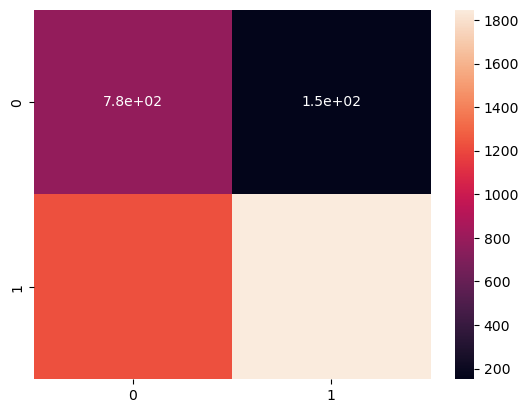

In [25]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
import seaborn as sns
sns.heatmap(c, annot=True)
print(c)

# F1 Score (Testing)

In [26]:
y_pred_test = neigh.predict(x_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Positive','Negative']))

0.6792452830188679
              precision    recall  f1-score   support

    Positive       0.30      0.81      0.44       198
    Negative       0.92      0.54      0.68       802

    accuracy                           0.59      1000
   macro avg       0.61      0.67      0.56      1000
weighted avg       0.80      0.59      0.63      1000



[[160  38]
 [370 432]]


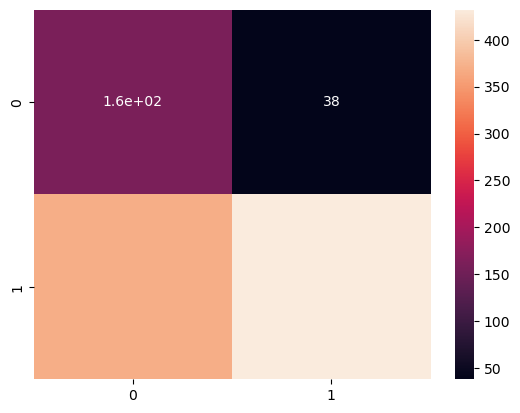

In [27]:
c= confusion_matrix(y_pred_test, y_test)
sns.heatmap(c, annot=True)
print(c)

# Naive bayes


full text dataset - MultinominalNB

numeric dataset - GaussianNB


In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_bow, y_train)







MultinomialNB()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define parameter grid for MultinomialNB
parameters = {'alpha': [0.001, 0.01,0.1,1.0,1,5, 2.0, 5.0]}

# Initialize the model
nb = MultinomialNB()

# GridSearchCV setup
Gsv = GridSearchCV(nb, parameters, cv=5, scoring='f1_macro')

# Fit the model on training data
Gsv.fit(x_train_bow, y_train)

# Get best results
print("Best alpha:", Gsv.best_params_)
print("Best F1 Score:", Gsv.best_score_)


Best alpha: {'alpha': 0.001}
Best F1 Score: 0.8346985763502435


In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)
nb.fit(x_train_bow, y_train)

# Fit with transformed BoW vector
nb.fit(x_train_bow, y_train)

# Predict
y_pred_train = neigh.predict(x_train_bow)
y_pred_test = neigh.predict(x_test_bow)

from sklearn.metrics import accuracy_score
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))



Train accuracy: 0.6555
Test accuracy: 0.592


In [31]:
from sklearn.metrics import f1_score, classification_report
nb.fit(x_train_bow, y_train)

y_pred_test = neigh.predict(x_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Positive','Negative']))

0.6792452830188679
              precision    recall  f1-score   support

    Positive       0.30      0.81      0.44       198
    Negative       0.92      0.54      0.68       802

    accuracy                           0.59      1000
   macro avg       0.61      0.67      0.56      1000
weighted avg       0.80      0.59      0.63      1000



In [32]:
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'Precision: {precision:.2f}')



recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'F1 Score: {f1:.2f}')



Accuracy: 0.59
Precision: 0.68
Recall: 0.59
F1 Score: 0.55


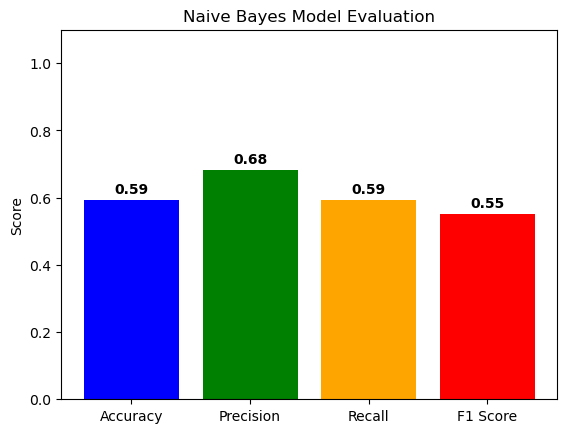

In [33]:
import matplotlib.pyplot as plt

# Store the metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plot the bar chart
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])

# Add labels above each bar
for i, (metric, score) in enumerate(metrics.items()):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.ylabel('Score')
plt.title('Naive Bayes Model Evaluation')
plt.ylim(0, 1.1)  # Add a little extra space for the labels
plt.show()


# **Logistic regression**

In [34]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1)
lgr.fit(x_train_bow, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, random_state=1)

In [35]:
# Test the training data


y_pred_train = lgr.predict(x_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)

f1_train = f1_score(y_pred_train,y_train)

# Test the test data

y_pred_test = lgr.predict(x_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)
print("    Traning                       Test ")
print("Accuracy :", accuracy_train ,"f1 score :",f1_train)
print("accuracy :", accuracy_test ," f1 Score :",f1_test)
print()

    Traning                       Test 
Accuracy : 0.96725 f1 score : 0.9673235220753305
accuracy : 0.793  f1 Score : 0.7832460732984293



In [36]:

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'Precision: {precision:.2f}')



recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'F1 Score: {f1:.2f}')



Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


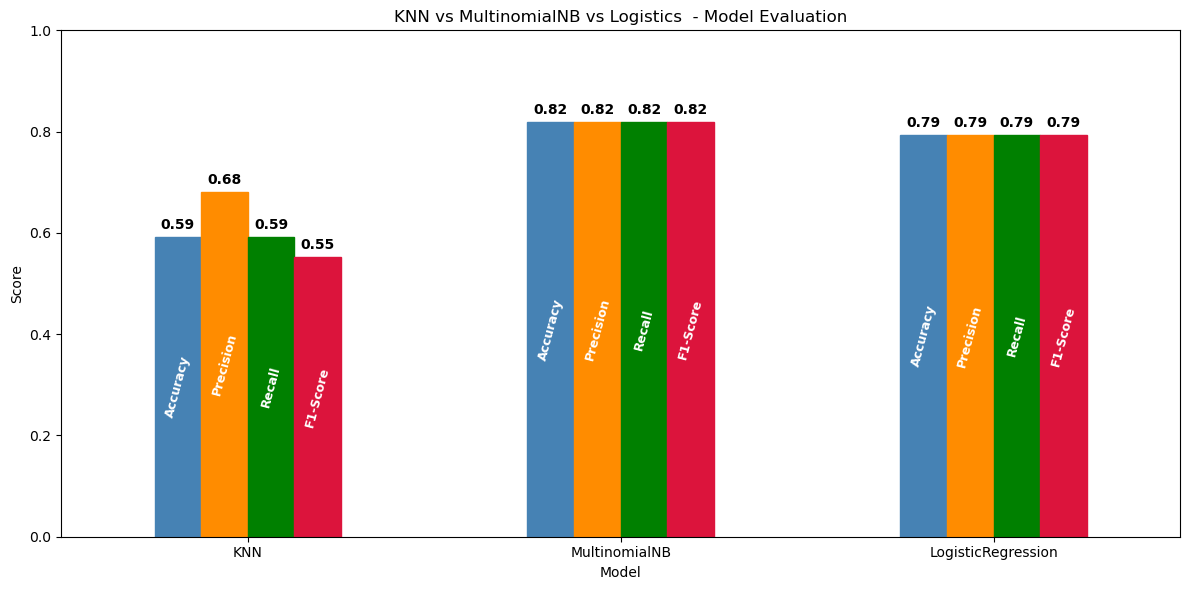

In [37]:

from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=60),
    'MultinomialNB': MultinomialNB(alpha=1),
    'LogisticRegression': LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1)
}


results = []
for name, model in models.items():
    model.fit(x_train_bow, y_train)
    y_pred = model.predict(x_test_bow)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=1)
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).set_index('Model')

# Plotting
ax = df_results.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title("KNN vs MultinomialNB vs Logistics  - Model Evaluation")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Bar color mapping to metric names
colors = {
    'Accuracy': 'steelblue',
    'Precision': 'darkorange',
    'Recall': 'green',
    'F1-Score': 'crimson'
}

# Manually set colors to bars + add metric label inside each bar
for bars, metric_name in zip(ax.containers, df_results.columns):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
        ax.text(bar.get_x() + bar.get_width() / 2, height / 2, metric_name,
                ha='center', va='center', color='white', fontsize=9, fontweight='bold',rotation =75)
        bar.set_color(colors[metric_name])  # Set custom color

plt.tight_layout()
plt.show()



In [38]:
!pip install prettytable


In [39]:

from prettytable import PrettyTable

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Add rows from df_results
for model_name, row in df_results.iterrows():
    accuracy = round(row['Accuracy'], 2)
    precision = round(row['Precision'], 2)
    recall = round(row['Recall'], 2)
    f1 = round(row['F1-Score'], 2)

    table.add_row([model_name, accuracy, precision, recall, f1])

print(table)


+--------------------+----------+-----------+--------+----------+
|       Model        | Accuracy | Precision | Recall | F1-Score |
+--------------------+----------+-----------+--------+----------+
|        KNN         |   0.59   |    0.68   |  0.59  |   0.55   |
|   MultinomialNB    |   0.82   |    0.82   |  0.82  |   0.82   |
| LogisticRegression |   0.79   |    0.79   |  0.79  |   0.79   |
+--------------------+----------+-----------+--------+----------+


# use PipeLine (at Pro level)

In [40]:
# pipeline = Pipeline([
#     ('bow', CountVectorizer()),
#     ('knn', KNeighborsClassifier())
# ])

# # 3. Define param grid for GridSearchCV
# param_grid = {
#     'bow__max_df': [0.8, 1.0],
#     'bow__ngram_range': [(1,1), (1,2)],
#     'knn__n_neighbors': list(range(45, 90, 5))
# }

# # 4. Setup GridSearchCV
# grid = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=5,
#     scoring='f1_macro',
#     verbose=1,
#     n_jobs=-1,
#     error_score='raise'  # To raise errors directly if any
# )

# # 5. Fit grid search on raw text x_train
# grid.fit(x_train, y_train)

# # 6. Predict and evaluate on raw text x_test
# y_pred = grid.predict(x_test)

# print("\n✅ Best Parameters Found:\n", grid.best_params_)
# print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

In [41]:
df['sentiment']

0       1
1       1
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: sentiment, Length: 5000, dtype: int64

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [text_processing(doc) for doc in X]


In [43]:
from text_cleaner import TextCleaner   # ✅ import from module
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
import joblib

# Define the pipeline
pipeline = Pipeline([
    ('cleaner', TextCleaner()),

    ('vectorizer', CountVectorizer(max_features=1000)),

    ('classifier', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(
                penalty='l2',
                C=10,
                class_weight='balanced',
                random_state=1,
                solver='lbfgs',
                n_jobs=-1
            )),
            ('knn', KNeighborsClassifier(n_neighbors=60)),
            ('nb', MultinomialNB(alpha=1))
        ],
        voting='hard'
    ))
])

# Train your pipeline
pipeline.fit(x_train, y_train)

# Save the pipeline with clean module reference
joblib.dump(pipeline, "final_pipeline.pkl")
print("✅ Pipeline trained and saved successfully!")
load_model = joblib.load("final_pipeline.pkl")


✅ Pipeline trained and saved successfully!


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('cleaner', TextCleaner()),
#     ('vectorizer', CountVectorizer(max_features=1000)),
#     ('classifier', LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1))
# ])


In [45]:
# from sklearn.ensemble import VotingClassifier

# pipeline = Pipeline([
#     ('cleaner', TextCleaner()),

#     ('vectorizer', CountVectorizer(max_features=1000)),

#     ('classifier', VotingClassifier(
#         estimators=[
#             ('lr', LogisticRegression(
#                 penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1)),

#             ('knn', KNeighborsClassifier(n_neighbors=60)),
#             ('nb', MultinomialNB(alpha=1))
#         ],
#         voting='hard'))

# ])
# pipeline.fit(x_train,y_train)

In [46]:
# # save the model
# import pickle
# filename='final_pipeline.sav'
# pickle.dump(pipeline,open(filename,'wb'))

In [47]:
# # save the model
# # import pickle
# # filename='final_pipeline.pkl'
# # pickle.dump(pipeline,open(filename,'wb'))

# import joblib
# # after creating your pipeline object...
# joblib.dump(pipeline, "final_pipeline.pkl")
# print("pipeline saved successfully")



In [48]:
# #load model
# load_model= pickle.load(open(filename,'rb'))

# result= load_model.predict(['The movie was  so good'])

# if result==1:
#   print('Positive')

# else:
#   print('negative')
import joblib


load_model = joblib.load("final_pipeline.pkl")

result = load_model.predict(['The movie was so good'])

if result[0] == 1:
    print('Positive')
else:
    print('Negative')


Positive
